In [3]:
!pip install pypyodbc

  Using cached https://files.pythonhosted.org/packages/ea/48/bb5412846df5b8f97d42ac24ac36a6b77a802c2778e217adc0d3ec1ee7bf/pypyodbc-1.3.5.2.zip
  Running setup.py install for pypyodbc: started
    Running setup.py install for pypyodbc: finished with status 'done'
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
!pip install pandas

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



In [5]:
!pip install matplotlib

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import pypyodbc as podbc
import pandas as pd
import numpy as np

In [7]:
# DB Connection 
conn=podbc.connect("Driver={SQL Server};Server=localhost,1433;Database=APPWMS;uid=sa;pwd=sa2019")

In [19]:
query = """select invlod.lodnum, invsub.subnum, invdtl.prtnum, invdtl.untqty 
from invlod inner join invsub 
on invlod.lodnum = invsub.lodnum 
inner join invdtl 
on invsub.subnum = invdtl.subnum 
where invlod.lodnum not like 'PERM%'"""

In [11]:
df = pd.read_sql(query, conn)

In [12]:
df.head(5)

,lodnum,subnum,prtnum,untqty
0,LPNCARTON,CTN000000K,CELLPHONE,1
1,LPNCARTON,CTN000000K,PHONECHARGER,1
2,LPNCARTON,CTN000000K,LEATHERCASE,1
3,LPNCARTON,CTN000000L,CELLPHONE,1
4,LPNCARTON,CTN000000L,PHONECHARGER,1


In [13]:
df.groupby(['prtnum']).agg({'prtnum':'count'})

,prtnum
prtnum,
ANTACID,12
ANTACID20CT,25
ASPIRIN20CT,23
AVOCADO,25
BANDAIDS,12
...,...
VITAMINA,15
VITAMINB,14
VITAMINC,14


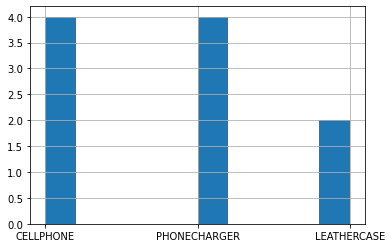

In [14]:
a_head = df.head(10)
a_head['prtnum'].hist()

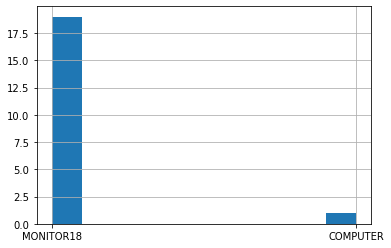

In [15]:
a_head = df.tail(20)
a_head['prtnum'].hist()

In [16]:
df[['lodnum','subnum','prtnum','untqty']].sort_values(['untqty'],ascending=False).head(5)

,lodnum,subnum,prtnum,untqty
1526,LPN70001,S0000006082B,BLUEPEN,20000
1527,LPN70002,S0000006082C,REDPEN,20000
1528,LPN70003,S0000006082D,PINKPEN,20000
1529,LPN70004,S0000006082E,GREENPEN,20000
1530,LPN70005,S0000006082G,ORANGEPEN,20000


In [12]:
df['prtnum'].unique()

array(['CELLPHONE', 'PHONECHARGER', 'LEATHERCASE', 'DEODORANT', 'SHAMPOO',
       'CONDITIONER', 'BULB50W', 'BULB70W', 'BULB90W', 'JEANSGREEN3335',
       'VESTGREENMED', 'SHIRTTAN3317', 'TOYDOLL', 'TOYTRUCK', 'TOYTRAIN',
       'BASEBALL', 'FOOTBALL', 'BASKETBALL', 'JEANSGREEN3536',
       'VESTGREENLARGE', 'SHIRTTAN3519', 'GOLFBALL', 'GOLFTEE',
       'GOLFVISOR', 'KEYBOARD', 'OIL30W', 'PAINTBRUSH', 'PAINTROLLER',
       'PAINTMIX', 'BATTERIESA', 'BATTERIESB', 'BATTERIESC',
       'PLANTFOOD01', 'PLANTFOOD', 'PLANTFOOD02', 'PLANTFOOD03',
       'PLANTFOOD04', 'PLANTFOOD05', 'PLANTFOOD06', 'PLANTFOOD07',
       'PLANTFOOD08', 'PLANTFOOD09', 'PLANTFOOD10', 'PLANTFOOD11',
       'PLANTFOOD12', 'PLANTSOIL', 'PLANTSOIL01', 'PLANTSOIL03',
       'PLANTSOIL05', 'PLANTSOIL07', 'PLANTSOIL09', 'PLANTSOIL11',
       'PLANTSOIL02', 'PLANTSOIL04', 'PLANTSOIL06', 'PLANTSOIL08',
       'PLANTSOIL10', 'PLANTSOIL12', 'PLANTSEEDS', 'PLANTSEEDS01',
       'PLANTSEEDS03', 'PLANTSEEDS05', 'PLANTSEEDS07',

In [17]:
df[(df.untqty>1000) & (df.prtnum=='BLUEPEN')]

,lodnum,subnum,prtnum,untqty
1526,LPN70001,S0000006082B,BLUEPEN,20000


In [18]:
df.groupby(['prtnum']).agg({'untqty': [np.max ,np.mean]})

untqty             
              amax         mean
prtnum                         
ANTACID       2000  2000.000000
ANTACID20CT   1993   159.240000
ASPIRIN20CT   1986   170.782609
AVOCADO        240   240.000000
BANDAIDS      1000  1000.000000
...            ...          ...
VITAMINA      4500  3920.000000
VITAMINB      4500  3878.571429
VITAMINC      4500  3878.571429
WATER          320   320.000000
WHEATNOODLE    450   450.000000

[294 rows x 2 columns]